In [76]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


import numpy as np
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Flatten 
from keras.layers.convolutional import Conv1D 
from keras.layers.convolutional import MaxPooling1D
import keras.optimizers


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import openpyxl
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.optimizers import Adam
import tensorflow as tf





import numpy as np
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Flatten 
from keras.layers.convolutional import Conv1D 
from keras.layers.convolutional import MaxPooling1D
import keras.optimizers


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import openpyxl
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.optimizers import Adam



preprocessing

In [78]:
dataset = read_csv('F:\Machin Learning\datadjai.csv')
values = dataset.values
values = values.astype('float32')
print (values.dtype)
print (values.astype)
print (values)
print (values.shape)

float32
<built-in method astype of numpy.ndarray object at 0x0000022FF9E7B4B0>
[[11501.85 11641.07 11180.98 11357.51]
 [11349.75 11358.44 10907.03 10997.93]
 [10989.37 11337.65 10862.66 11122.65]
 ...
 [35353.06 35475.4  35348.48 35443.82]
 [35401.73 35422.71 35269.4  35369.09]
 [34467.98 34557.37 33833.32 33843.92]]
(5454, 4)


In [79]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
print (scaled)
print (scaled.shape)

[[0.17082976 0.1691086  0.16328394 0.16543101]
 [0.16558577 0.15931979 0.15384868 0.1530651 ]
 [0.15316083 0.1585997  0.15232047 0.15735422]
 ...
 [0.99315625 0.9946041  0.99565005 0.99375564]
 [0.99483436 0.99277925 0.99292636 0.9911856 ]
 [0.96264106 0.9628085  0.9434656  0.9387353 ]]
(5454, 4)


In [80]:
column_titles = ['Open', 'High', 'Low', 'Close']

data = pd.DataFrame(scaled, columns=column_titles)
print(data)

          Open      High       Low     Close
0     0.170830  0.169109  0.163284  0.165431
1     0.165586  0.159320  0.153849  0.153065
2     0.153161  0.158600  0.152320  0.157354
3     0.157436  0.162414  0.155783  0.161846
4     0.162045  0.169614  0.162846  0.171107
...        ...       ...       ...       ...
5449  0.994477  0.993717  0.993631  0.990898
5450  0.994345  0.992248  0.993534  0.989241
5451  0.993156  0.994604  0.995650  0.993756
5452  0.994834  0.992779  0.992926  0.991186
5453  0.962641  0.962808  0.943466  0.938735

[5454 rows x 4 columns]


In [81]:
import pandas as pd
import numpy as np

class MultivariateTimeSeriesConverter:
    def __init__(self, input_cols, target_cols, window_size=1, future_steps=1):
        """
        Initialize the MultivariateTimeSeriesConverter class.

        Args:
        input_cols (list): List of column names to be used as input features.
        target_cols (list): List of column names to be used as target features.
        window_size (int): Size of the sliding window for creating sequences (default: 1).
        future_steps (int): Number of future steps to predict (default: 1).
        """
        self.input_cols = input_cols
        self.target_cols = target_cols
        self.window_size = window_size
        self.future_steps = future_steps

    def convert_to_multivariate_time_series(self, data):
        """
        Convert input data into multivariate time series data.

        Args:
        data (pd.DataFrame): Input data as a pandas DataFrame.

        Returns:
        tuple: Tuple containing numpy arrays for input features and target features.
        """
        # Extract input and target data from the original data
        input_data = data[self.input_cols].values
        target_data = data[self.target_cols].values

        # Initialize empty arrays for input and target sequences
        input_seqs = []
        target_seqs = []

        # Iterate through the data to create input and target sequences
        for i in range(len(data) - self.window_size - self.future_steps + 1):
            input_seqs.append(input_data[i:i + self.window_size])
            target_seqs.append(target_data[i + self.window_size:i + self.window_size + self.future_steps])

        # Convert input and target sequences to numpy arrays
        input_seqs = np.array(input_seqs)
        target_seqs = np.array(target_seqs)

        return input_seqs, target_seqs

In [82]:
input_cols = ['Open', 'High', 'Low', 'Close']
target_cols = ['Close']
window_size = 5
future_steps = 1

datatrain, datatest = data [:5000], data [5000:]

converter = MultivariateTimeSeriesConverter(input_cols, target_cols, window_size=window_size, future_steps=future_steps)
input_seqs_train, target_seqs_train = converter.convert_to_multivariate_time_series(datatrain)
input_seqs_test, target_seqs_test = converter.convert_to_multivariate_time_series(datatest)


print (input_seqs_train)
print (target_seqs_train)

print (input_seqs_test)
print (target_seqs_test)




[[[0.17082976 0.1691086  0.16328394 0.16543101]
  [0.16558577 0.15931979 0.15384868 0.1530651 ]
  [0.15316083 0.1585997  0.15232047 0.15735422]
  [0.157436   0.16241437 0.15578255 0.16184585]
  [0.16204526 0.16961357 0.16284582 0.17110704]]

 [[0.16558577 0.15931979 0.15384868 0.1530651 ]
  [0.15316083 0.1585997  0.15232047 0.15735422]
  [0.157436   0.16241437 0.15578255 0.16184585]
  [0.16204526 0.16961357 0.16284582 0.17110704]
  [0.17188583 0.17340675 0.17175722 0.17281418]]

 [[0.15316083 0.1585997  0.15232047 0.15735422]
  [0.157436   0.16241437 0.15578255 0.16184585]
  [0.16204526 0.16961357 0.16284582 0.17110704]
  [0.17188583 0.17340675 0.17175722 0.17281418]
  [0.17312665 0.17281589 0.17076874 0.17071225]]

 ...

 [[0.7224115  0.7204689  0.7237364  0.7203154 ]
  [0.72249806 0.7192806  0.72216105 0.72031295]
  [0.7255121  0.72789145 0.7284415  0.7265802 ]
  [0.72882324 0.7251303  0.7280561  0.72680163]
  [0.7251845  0.7258037  0.72594476 0.72715414]]

 [[0.72249806 0.7192806  0

In [83]:
print (input_seqs_train.shape)
print (target_seqs_train.shape)

(4995, 5, 4)
(4995, 1, 1)


In [84]:
print (input_seqs_test.shape)
print (target_seqs_test.shape)

(449, 5, 4)
(449, 1, 1)


model creation

In [86]:
model = Sequential() 
model.add(Conv1D(filters=64, kernel_size=2, activation='relu' ))
model.add(MaxPooling1D(pool_size=2)) 
model.add(Flatten()) 
model.add(Dense(50, activation='relu' )) 
model.add(Dense(1)) 
model.compile(optimizer='adam' , loss='mse' )

In [ ]:
history_model=model.fit(input_seqs_train, target_seqs_train, epochs=500, verbose=0)
print (history_model)

model.summary() 

print(history_model.history['loss'])

In [68]:
testscore = model.evaluate(input_seqs_test, target_seqs_test, verbose=0)
print(testscore)


4.998172153136693e-05


In [69]:
trainscore = model.evaluate(input_seqs_train, target_seqs_train, verbose=0)
print(trainscore)


0.00015180354239419103


In [70]:
prediction_test = model.predict(input_seqs_test)
print (prediction_test)

41/41 [==============================] - 0s 475us/step
[[0.11567661]
 [0.11552341]
 [0.11365806]
 ...
 [0.23334071]
 [0.23636287]
 [0.23565021]]


In [71]:
prediction_train = model.predict(input_seqs_train)
print (prediction_train)

484/484 [==============================] - 0s 538us/step
[[0.80051136]
 [0.8004918 ]
 [0.798759  ]
 ...
 [0.11621529]
 [0.11691839]
 [0.11584332]]


In [73]:
real_targets = np.concatenate((target_seqs_train, target_seqs_test), axis=0)
print (real_targets)
print (real_targets.shape)

real_targets_reshape = real_targets.reshape(-1)
print (real_targets_reshape)
print (real_targets_reshape.shape)


[[[0.80224377]
  [0.79873186]
  [0.7947077 ]
  ...
  [0.79493517]
  [0.7928919 ]
  [0.7888109 ]]

 [[0.79873186]
  [0.7947077 ]
  [0.79062885]
  ...
  [0.7928919 ]
  [0.7888109 ]
  [0.7874319 ]]

 [[0.7947077 ]
  [0.79062885]
  [0.7903008 ]
  ...
  [0.7888109 ]
  [0.7874319 ]
  [0.790042  ]]

 ...

 [[0.23594683]
  [0.23539758]
  [0.24170238]
  ...
  [0.23933274]
  [0.23868358]
  [0.23769313]]

 [[0.23539758]
  [0.24170238]
  [0.24032092]
  ...
  [0.23868358]
  [0.23769313]
  [0.23868138]]

 [[0.24170238]
  [0.24032092]
  [0.23954213]
  ...
  [0.23769313]
  [0.23868138]
  [0.23873293]]]
(16783, 10, 1)
[0.80224377 0.79873186 0.7947077  ... 0.23769313 0.23868138 0.23873293]
(167830,)


In [74]:
prediction_targets = np.concatenate((prediction_train, prediction_test), axis=0)
print (prediction_targets)
print (prediction_targets.shape)



[[0.80051136]
 [0.8004918 ]
 [0.798759  ]
 ...
 [0.23334071]
 [0.23636287]
 [0.23565021]]
(16783, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

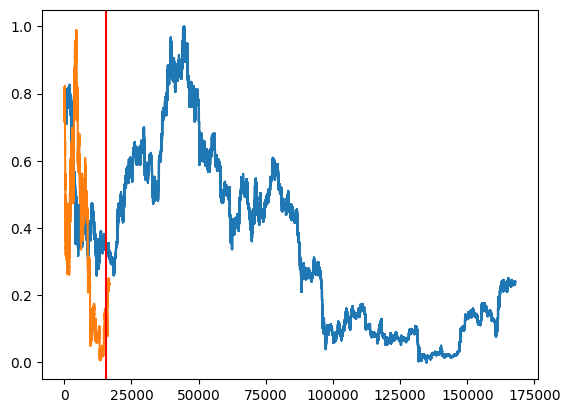

In [75]:
plt.plot (real_targets_reshape)
plt.plot (prediction_targets) 
plt.axvline (len(target_seqs_train), c="r")
plt.show

In [60]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
print (scaled)
print (scaled.shape)

[[0.7942802  0.79779655 0.7935249  0.7958686 ]
 [0.7960783  0.805044   0.7934287  0.80652815]
 [0.8080145  0.80492586 0.80184454 0.80111223]
 ...
 [0.23882362 0.23712534 0.23913151 0.23769313]
 [0.23788509 0.23700184 0.2386533  0.23868138]
 [0.23880276 0.23678601 0.24010772 0.23873293]]
(16811, 4)


In [20]:
values_non_scale = scaler.inverse_transform(scaled)
print (values_non_scale)

[[57714.668 58063.906 57557.547 57809.832]
 [57809.902 58448.34  57552.457 58374.47 ]
 [58442.08  58442.074 57997.453 58087.59 ]
 ...
 [28296.111 28323.547 28243.387 28243.389]
 [28246.404 28316.994 28218.102 28295.734]
 [28295.008 28305.547 28295.006 28298.467]]


In [21]:
column_titles = ['Open', 'High', 'Low', 'Close']

data__to_csv = pd.DataFrame(values_non_scale, columns=column_titles)
print(data__to_csv)

file_path = 'F:\Machin Learning\data__to_csv.csv'
data__to_csv.to_csv(file_path, index=False)

               Open          High           Low         Close
0      57714.667969  58063.906250  57557.546875  57809.832031
1      57809.902344  58448.339844  57552.457031  58374.468750
2      58442.078125  58442.074219  57997.453125  58087.589844
3      58120.539062  58235.437500  58088.890625  58185.214844
4      58198.867188  58240.062500  57798.453125  58065.183594
...             ...           ...           ...           ...
16806  28318.177734  28357.644531  28292.347656  28330.238281
16807  28319.666016  28335.804688  28289.373047  28295.851562
16808  28296.111328  28323.546875  28243.386719  28243.388672
16809  28246.404297  28316.994141  28218.101562  28295.734375
16810  28295.007812  28305.546875  28295.005859  28298.466797

[16811 rows x 4 columns]


In [22]:
column_titles = ['Close(target)']

target__to_csv = pd.DataFrame(prediction_targets, columns=column_titles)

file_path = 'F:/Machin Learning/target__to_csv.csv'
target__to_csv.to_csv(file_path, index=False)

In [23]:
column_titles = ['real(target)']

realtarget__to_csv = pd.DataFrame(prediction_targets, columns=column_titles)

file_path = 'F:/Machin Learning/realtarget__to_csv.csv'
realtarget__to_csv.to_csv(file_path, index=False)

In [24]:
print (prediction_targets.astype)
print (prediction_targets.dtype)
print (prediction_targets.shape)
print (prediction_targets)

<built-in method astype of numpy.ndarray object at 0x00000275A6CDAE70>
float32
(16803, 1)
[[0.80495876]
 [0.8034034 ]
 [0.80402327]
 ...
 [0.2392298 ]
 [0.23966369]
 [0.23843402]]


In [25]:
prediction_targets_dim = np.concatenate((prediction_targets, prediction_targets, prediction_targets, prediction_targets), axis=1)

print (prediction_targets_dim)

[[0.80495876 0.80495876 0.80495876 0.80495876]
 [0.8034034  0.8034034  0.8034034  0.8034034 ]
 [0.80402327 0.80402327 0.80402327 0.80402327]
 ...
 [0.2392298  0.2392298  0.2392298  0.2392298 ]
 [0.23966369 0.23966369 0.23966369 0.23966369]
 [0.23843402 0.23843402 0.23843402 0.23843402]]


In [26]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)

prediction_targets_non_scale = scaler.inverse_transform(prediction_targets_dim)
print (prediction_targets_non_scale)

[[58280.23  58443.82  58162.12  58291.34 ]
 [58197.86  58361.316 58079.875 58208.953]
 [58230.688 58394.2   58112.652 58241.79 ]
 ...
 [28317.627 28435.176 28248.584 28324.785]
 [28340.605 28458.19  28271.525 28347.766]
 [28275.477 28392.965 28206.506 28282.633]]


In [27]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
min_values = scaler.data_min_
max_values = scaler.data_max_
print("Minimum values for each column: ", min_values)
print("Maximum values for each column: ", max_values)

Minimum values for each column:  [15647.336 15745.421 15599.047 15652.829]
Maximum values for each column:  [68610.17  68789.625 68475.14  68622.63 ]


In [34]:
column_4 = prediction_targets_non_scale[:, 3]
column_4 = column_4.reshape(-1, 1)
print (column_4)

[[58291.34 ]
 [58208.953]
 [58241.79 ]
 ...
 [28324.785]
 [28347.766]
 [28282.633]]


new prediction

In [108]:
datasetnew = read_csv('F:\Machin Learning\Book18apr2.csv')


In [109]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
prediction_new_data_scaled = scaler.transform(datasetnew)
print (prediction_new_data_scaled)

[[0.26064813 0.25873852 0.25892519 0.25899984]
 [0.2591754  0.25785246 0.25574795 0.2592075 ]
 [0.25934533 0.25928523 0.26068402 0.26075555]
 [0.26123345 0.25953031 0.26212134 0.26068004]
 [0.26081806 0.25975654 0.26204569 0.25979274]
 [0.26181876 0.26190569 0.26316151 0.26237912]]


F:\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [110]:
min_values = scaler.data_min_
max_values = scaler.data_max_
print("Minimum values for each column: ", min_values)
print("Maximum values for each column: ", max_values)

Minimum values for each column:  [15647.336 15745.421 15599.047 15652.829]
Maximum values for each column:  [68610.17  68789.625 68475.14  68622.63 ]


In [111]:
column_titles_new = ['Open', 'High', 'Low', 'Close']

datanew = pd.DataFrame(prediction_new_data_scaled, columns=column_titles_new)
print(datanew)

       Open      High       Low     Close
0  0.260648  0.258739  0.258925  0.259000
1  0.259175  0.257852  0.255748  0.259208
2  0.259345  0.259285  0.260684  0.260756
3  0.261233  0.259530  0.262121  0.260680
4  0.260818  0.259757  0.262046  0.259793
5  0.261819  0.261906  0.263162  0.262379


In [113]:
new_input_seqs, _ = converter.convert_to_multivariate_time_series(datanew)

# 4. Feed the input sequences to the trained model using the predict() method of the model object
predictions = model.predict(new_input_seqs)

print (predictions)



1/1 [==============================] - 0s 15ms/step
[[0.26034868]
 [0.26186517]]
